In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("hyd-monthly-rains.csv")
df.head(30)

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,10.112927,52.862372,7.168071,75.917375,32.831126,83.528905,188.379469,119.180072,44.675581,88.293638,24.407491,0.000000,727.357028
1,1902,0.240396,0.000000,1.652090,8.938205,7.725327,45.802008,36.952134,134.102439,270.882651,80.018227,16.555297,6.553475,609.422251
2,1903,9.087042,0.000000,0.000000,9.145082,72.514370,23.707486,315.810907,279.061634,229.481830,281.198519,56.139121,1.791662,1277.937654
3,1904,0.000000,0.000000,8.360287,6.717636,33.226691,101.047456,155.568144,26.521762,170.547767,67.828693,0.000000,0.000000,569.818436
4,1905,0.000000,1.681273,9.383354,13.284002,73.832949,49.214737,53.542535,229.292151,93.277458,52.497142,0.000000,0.000000,576.005602
5,1906,71.067005,0.000000,0.000000,2.812402,7.633192,200.127497,144.315883,158.656011,102.807883,68.678941,3.477802,50.046886,809.623503
6,1907,0.961584,0.000000,20.391978,157.427069,0.000000,118.577083,181.582985,201.444248,65.778464,0.136468,3.015005,26.868880,776.183765
7,1908,1.044521,0.764223,3.026495,1.256567,0.968646,122.748393,97.675357,166.767097,497.116671,2.427807,0.000000,0.000000,893.795778
8,1909,0.384634,0.604007,0.000000,66.094051,4.482251,151.449612,198.137322,94.976031,166.615558,8.484586,0.000000,0.000000,691.228051
9,1910,0.000000,0.000000,0.000000,1.464826,9.384546,158.429802,96.795666,135.171103,152.647068,97.074867,40.753163,0.000000,691.721042


In [3]:
nan_cnt= df.isnull().sum()
print(nan_cnt)

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64


In [4]:
dup=df.duplicated()
dup

0      False
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Length: 121, dtype: bool

In [5]:
df["20_Gap"]=(df['Year'] // 20) * 20
df["20_Gap"]

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
116    2000
117    2000
118    2000
119    2020
120    2020
Name: 20_Gap, Length: 121, dtype: int64

In [6]:
monthly_cols = ["Jan", "Feb", "Mar", "April", "May", "June",
                "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

df_20Gap = df.groupby("20_Gap")[monthly_cols].mean().round(2)
df__trp=df_20Gap.transpose()
df_melt=df__trp.reset_index().melt(id_vars='index', var_name='20_Gap', value_name='Rainfall')
df_melt.rename(columns={'index': 'Month'}, inplace=True)
df_melt['20_Gap'] = df_melt['20_Gap'].astype(str)

In [7]:
import plotly.express as px
fig=px.line(
   df_melt,
   x='Month',
   y='Rainfall',
   color='20_Gap',
   markers=True,
   hover_name='20_Gap',
   hover_data={'Rainfall': True, 'Month':True}
)

fig.update_layout(
   title='Average Rainfall by 2 Decades',
   xaxis_title='Months',
   yaxis_title='Months',
   width=1000,
   height=600
)

fig.show()

In [8]:
df_melt.head(25)

,Month,20_Gap,Rainfall
0,Jan,1900,6.68
1,Feb,1900,8.80
2,Mar,1900,11.88
3,April,1900,27.76
4,May,1900,26.98
5,June,1900,113.15
6,July,1900,162.91
7,Aug,1900,146.70
8,Sept,1900,176.56
9,Oct,1900,79.95


In [9]:
#Q-1 what is the average montlhy rainfall

df.drop(columns=['20_Gap'], axis=1, inplace=True)
months_map = {
    "Jan": "January",
    "Feb": "February",
    "Mar": "March",
    "April": "April",
    "May": "May",
    "June": "June",
    "July": "July",
    "Aug": "August",
    "Sept": "September",
    "Oct": "October",
    "Nov": "November",
    "Dec": "December"
}

for col in df.columns:
   if col !='Year' and col!='Total':
       Avg=np.average(df[col])
       print(f"Average rainfall in {months_map[col]} from 1901-2020: {Avg}")


Average rainfall in January from 1901-2020: 6.5268561183719
Average rainfall in February from 1901-2020: 7.886726944024794
Average rainfall in March from 1901-2020: 12.788949790909093
Average rainfall in April from 1901-2020: 22.67243058266942
Average rainfall in May from 1901-2020: 28.00139551055372
Average rainfall in June from 1901-2020: 107.83380411008262
Average rainfall in July from 1901-2020: 163.8993655590083
Average rainfall in August from 1901-2020: 157.34340746024793
Average rainfall in September from 1901-2020: 163.82238486140497
Average rainfall in October from 1901-2020: 91.46731507523141
Average rainfall in November from 1901-2020: 25.135511989661154
Average rainfall in December from 1901-2020: 5.268676448900826


In [10]:
#Q-2 Wettest and Driest 

user_yr = int(
    input(
        "Please enter a number to select the time span for analyzing wettest and driest spells:\n"
        "  5  → Half Decade\n"
        " 10  → Decade\n"
        " 20  → Two Decades\n"
        "Your choice: "
    )
)
df_usr = df
if user_yr == 5:
    df_usr["half_decade"] = (df_usr["Year"] // 5) * 5
    hlfdcd_Avg = df_usr.groupby("half_decade")["Total"].mean().round(2)

    wettest_dec = hlfdcd_Avg.idxmax()
    wettest_val = hlfdcd_Avg.max()

    driest_dec = hlfdcd_Avg.idxmin()
    driest_val = hlfdcd_Avg.min()

elif user_yr == 5:
    df_usr["decade"] = (df_usr["Year"] // 10) * 10
    deacde_avg = df_usr.groupby("decade")["Total"].mean().round(2)

    wettest_dec = deacde_avg.idxmax()
    wettest_val = deacde_avg.max()

    driest_dec = deacde_avg.idxmin()
    driest_val = deacde_avg.min()


else:
    df_usr["TwoDecade"] = (df_usr["Year"] // 20) * 20
    twice_dcd = df_usr.groupby("TwoDecade")["Total"].mean().round(2)

    wettest_dec = twice_dcd.idxmax()
    wettest_val = twice_dcd.max()

    driest_dec = twice_dcd.idxmin()
    driest_val = twice_dcd.min()

print(f"Wettest decade: {wettest_dec} with avg {wettest_val:.2f} mm")
print(f"Driest decade: {driest_dec} with avg {driest_val:.2f} mm")

Wettest decade: 2020 with avg 1120.09 mm
Driest decade: 1920 with avg 732.19 mm


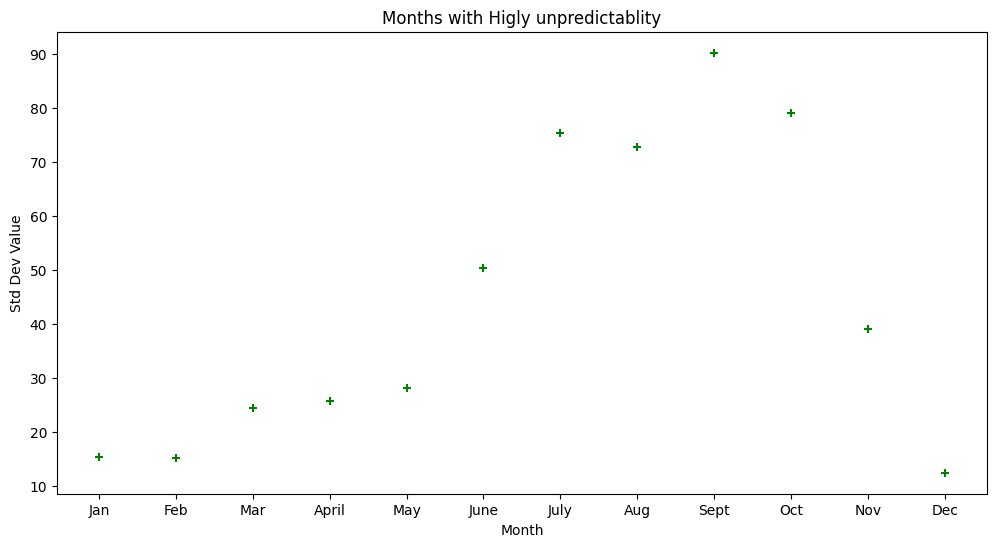

In [11]:
#Q-3 Are there any months with highly unpredictable rainfall?
stds={}
for col in monthly_cols:
   stds[col]=df[col].std()

sorted_stds = sorted(stds.items(), key=lambda x: x[1], reverse=True)

std_values = [stds[col] for col in monthly_cols]

plt.figure(figsize=(12,6))
plt.title("Months with Higly unpredictablity")
plt.scatter(monthly_cols, std_values, color='green', marker='+')
plt.xlabel('Month')
plt.ylabel('Std Dev Value')
plt.show()

In [12]:
#Q-4 Rainfall Trend 

fig=px.scatter(
   df,
   x='Year',
   y='Total',
   trendline='ols',
   trendline_color_override='purple'
)

fig.update_layout(
   title='Rainfall Trend',
   xaxis_title='Year',
   yaxis_title='Rainfall',
   width=1000,
   height=600
)

fig.show()

In [13]:
#Q-5 Trend of Monsoon onset over years
monsoon_month=['June','July','Aug','Sept']
onset_month=[]

for idx, row in df.iterrows():
   year=row['Year']
   for month in monsoon_month:
      if row[month] > 68:
         onset_month.append({'Year': year, 'OnsetMonth': month})
         break

df_onset=pd.DataFrame(onset_month)
month_order = {'June':6, 'July':7, 'Aug':8, 'Sept':9}
df_onset['NumericOnset']=df_onset['OnsetMonth'].map(month_order)

fig=px.scatter(
   df_onset,
   x='Year',
   y='NumericOnset',
   trendline='ols',
   trendline_color_override='red',
   labels={'NumericOnset': 'OnsetMonth (Numeric)'},
   title='Trend of Monsoon onset over years'
)

fig.show()

In [14]:
#Q-6 Extreme Rainfall Frequency

threshold={}

for month in monthly_cols:
   mn=df[month].mean()
   st=df[month].std()
   threshold[month]= mn+2*st

ext_cnt=[]
for idx, row in df.iterrows():
    year = row['Year']
    extreme_months = [month for month in monthly_cols if row[month] > threshold[month]]
    count_extremes = len(extreme_months)
    ext_cnt.append({'Year': year, 'ExtremeCount': count_extremes})

df_extreme = pd.DataFrame(ext_cnt)

fig = px.scatter(df_extreme, x='Year', y='ExtremeCount', trendline='ols',
                 title="Number of Extreme Rainfall Months per Year",
                 labels={'ExtremeCount': 'Extreme Months'})
fig.show()


In [15]:
df_decade=df
df_decade['decade']=(df_decade['Year']//10) *10
df_decade

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total,TwoDecade,decade
0,1901,10.112927,52.862372,7.168071,75.917375,32.831126,83.528905,188.379469,119.180072,44.675581,88.293638,24.407491,0.000000,727.357028,1900,1900
1,1902,0.240396,0.000000,1.652090,8.938205,7.725327,45.802008,36.952134,134.102439,270.882651,80.018227,16.555297,6.553475,609.422251,1900,1900
2,1903,9.087042,0.000000,0.000000,9.145082,72.514370,23.707486,315.810907,279.061634,229.481830,281.198519,56.139121,1.791662,1277.937654,1900,1900
3,1904,0.000000,0.000000,8.360287,6.717636,33.226691,101.047456,155.568144,26.521762,170.547767,67.828693,0.000000,0.000000,569.818436,1900,1900
4,1905,0.000000,1.681273,9.383354,13.284002,73.832949,49.214737,53.542535,229.292151,93.277458,52.497142,0.000000,0.000000,576.005602,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,7.111951,18.481173,30.193530,225.171792,143.562054,184.381353,199.858324,229.367607,0.379236,0.000000,1038.507021,2000,2010
117,2018,0.000000,0.000000,1.379888,33.635686,60.990646,117.251607,91.716469,121.431259,74.383542,22.334929,0.000000,47.157482,570.281508,2000,2010
118,2019,14.167822,0.530879,0.369189,20.313522,34.606489,94.542983,132.054654,146.249771,258.256705,169.716020,0.000000,2.807710,873.615744,2000,2010
119,2020,2.456763,6.358386,7.971729,22.438614,14.578018,145.467639,124.280878,278.414528,303.827835,319.002678,7.544558,0.000000,1232.341627,2020,2020


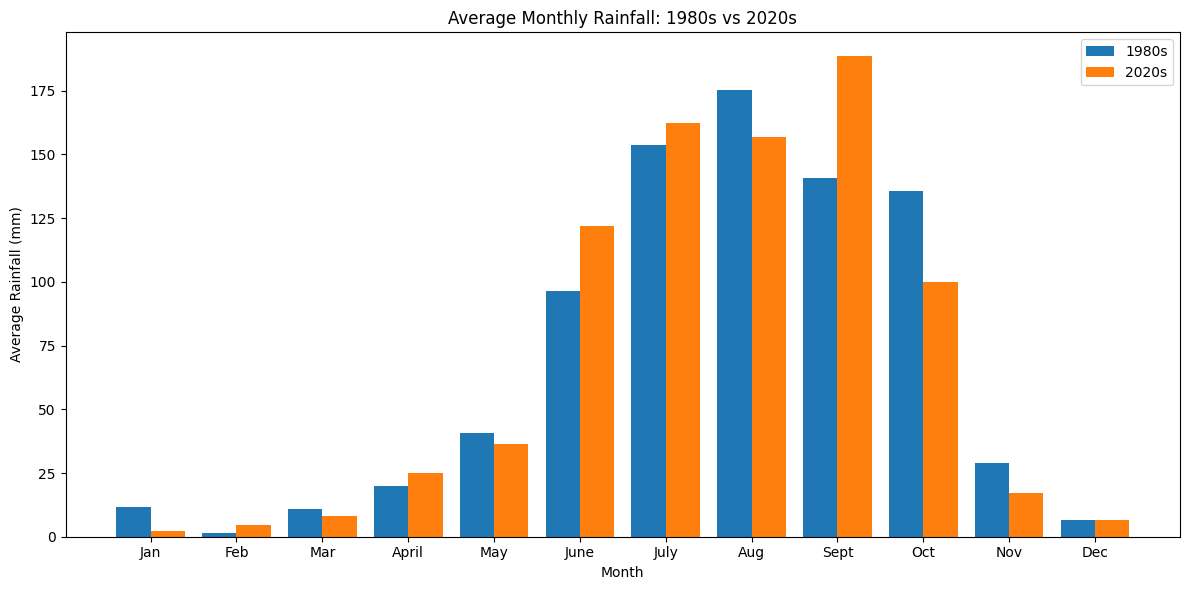

In [16]:
susbet=df_decade[df_decade['decade'].isin([1990,2010])]
annual_mean=susbet.groupby('decade')['Total'].mean().reset_index()

monthly_mean=susbet.groupby('decade')[monthly_cols].mean().T
monthly_mean.columns=[f"{d}s" for d in monthly_mean.columns]

decades_to_compare = [1980, 2020]

x = range(len(monthly_cols))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x, monthly_mean.iloc[:, 0], width=width, label=f"{decades_to_compare[0]}s")
plt.bar([i + width for i in x], monthly_mean.iloc[:, 1], width=width, label=f"{decades_to_compare[1]}s")

plt.xticks([i + width/2 for i in x], monthly_cols)
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title(f'Average Monthly Rainfall: {decades_to_compare[0]}s vs {decades_to_compare[1]}s')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
ln_mean=df_decade['Total'].mean()
df_decade['Anomaly']=df_decade['Total'] - ln_mean

df_decade['Anomaly_color'] = df_decade['Anomaly'].apply(lambda x: 'Below Normal' if x < 0 else 'Above Normal')

fig=px.bar(
   df_decade,
   x='Year',
   y='Anomaly',
   color='Anomaly_color',
   title="Annual Rainfall Anomaly: Hyderabad",
   labels=('Year','Yearwise Anomaly'),
   color_discrete_map={'Below Normal': 'red', 'Above Normal': 'green'}
)
fig.show()


#Q-9 ARIMA model [TIME SERIES ANALYSIS]
from statsmodels.tsa.arima.model import ARIMA

df['Year']=pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

ts_rainfall=df['Total']

my_model=ARIMA(ts_rainfall, order=(1,1,1))
md_fit=my_model.fit()

forecast = md_fit.forecast(steps=10)

print(f"forecast:{forecast}")

last_date = ts_rainfall.index[-1]

future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=10, freq='YE')

In [23]:
#Q-9 Rainfal Forecasting usin SARIMA (Seasonal Auto Regressive Integrated Moving Average) -fn()=> SARIMA(p,d,q) * (P,D,Q,s)
'''
Where:

(p,d,q) → same as ARIMA: non-seasonal autoregressive, differencing, moving average.

(P,D,Q,s) → seasonal AR, differencing, MA, and s = seasonal period length.

For monthly rainfall, s = 12 (12 months in a Cycle).

'''
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go

user_year = int(input("Enter the target year for forecast (e.g., 2025): "))

df=df.reset_index(drop=True)


ts_rainfall = df.set_index('Year')[monthly_cols].stack()
ts_rainfall.index = pd.date_range(start='1901-01-01', periods=len(ts_rainfall), freq='ME')

last_date = ts_rainfall.index[-1]
last_year = last_date.year

forecast_months=((user_year- last_year)) *12 -1

if forecast_months  <=0:
   raise ValueError("Target Year must be after last data year e.g. 2021!!")


order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(ts_rainfall, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

#print(model_fit.summary())

forecast = model_fit.get_forecast(steps=forecast_months)
forecast_ci = forecast.conf_int()
forecast_mean=forecast.predicted_mean

future_dates=pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_months, freq='MS')

fig = go.Figure()

print("⚠️ The Predicted Values are based upon previous recorded Normal or Avrage Values and does not count Uncertinity in Rainfall spells")

fig.add_trace(go.Scatter(
    x=future_dates,
    y=forecast_mean,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatter(
    x=future_dates.tolist() + future_dates[::-1].tolist(),
    y=forecast_ci.iloc[:, 0].tolist() + forecast_ci.iloc[:, 1][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0, 0, 255, 0.1)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='95% CI'
))

fig.update_layout(
    title=f'SARIMA Forecast: Upto December {user_year}',
    xaxis_title='Month',
    yaxis_title='Rainfall(mm)',
    width=1000,
    height=600,
    title_x=0.5
)

fig.show()


⚠️ The Predicted Values are based upon previous recorded Normal or Avrage Values and does not count Uncertinity in Rainfall spells
